In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

pd.set_option('max_column', None)

In [6]:
df = pd.read_csv('data/data.csv', parse_dates=['date'])

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Exploratory Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


From the descriptive Statistics,
1. one or more house(s) were sold at $0.0 and the most expensive house was sold for 26590000.
2. One or More house(s) has no bedrooms and bathrooms 
3. The lowest square fit for a living room was 370ft and the largest living room was 13540ft
4. Atleast One house had no view or no basement
5. Atleast one house has not been renovated.
6. The Oldest house was built in 1900 with the latest being 2014

**Let Explore the time Series trend of house price over date**

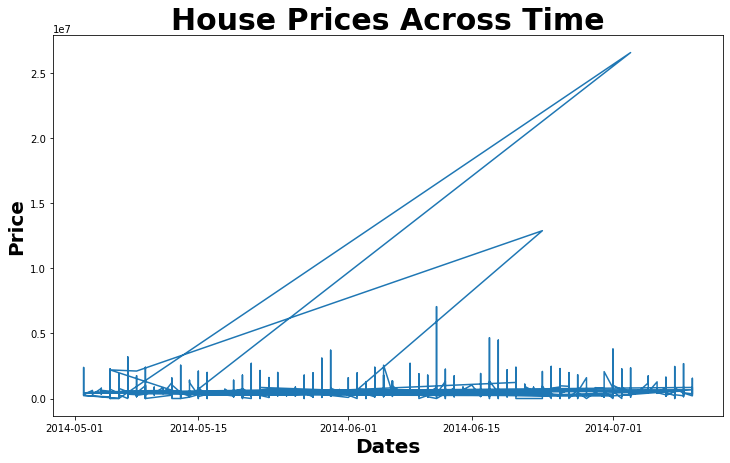

In [10]:
d = df[['date', 'price']]
d = d.set_index('date')
plt.figure(figsize=(12, 7))
plt.plot(d)
plt.title('House Prices Across Time', size=30, fontweight='bold')
plt.xlabel('Dates', fontsize=20, fontweight='bold')
plt.ylabel('Price', fontsize=20, fontweight='bold')
plt.show()

Not Showing any good results

<b>Let Move to Data Cleaning before Exploratory Analysis Proper...</b>

1. House with price = 0 means probably it wasn't sold maybe gifted or error in data collection and hence should be removed

In [11]:
df_copy = df.copy()

In [12]:
print(df_copy.shape)
df_copy = df_copy[df_copy['price'] != 0]
print(df_copy.shape)

(4600, 18)
(4551, 18)


About 49 Houses were either wrongly inputted or were not sold. Let the data collector be the Judge..

2. Let recheck the discriptive Statistics and find if more problem persist

In [13]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.899138,563929.871279,7800.0,326264.285715,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.000000,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.750000,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.000000,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.000000,7680.00,10978.0,1074218.0
floors,4551.0,1.512195,0.538531,1.0,1.000000,1.50,2.0,3.5
waterfront,4551.0,0.006592,0.080932,0.0,0.000000,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.000000,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.000000,3.00,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.000000,1590.00,2300.0,9410.0


Since we can't identify any abnormality or error in the data it is safe to continue to data exploration maybe we will discover more ambiguity...

For Exploration, I'll follow the Univariate then Bivariate Analysis Approach

### Univariate Analysis

In [14]:
df_copy.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [15]:
df_copy['date'].min(), df_copy['date'].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2014-07-10 00:00:00'))

The Data were collected and stored between 2014 of May 2nd till 2014 July 10th. This explains the reason why time series trend looked well very bad the other time because the data only covers a period of 2 months which is for me not enough to model a time series.

But then what if we resample the data, we resample to date then to week or month and maybe we might observe some trends. Let give it a try yes??

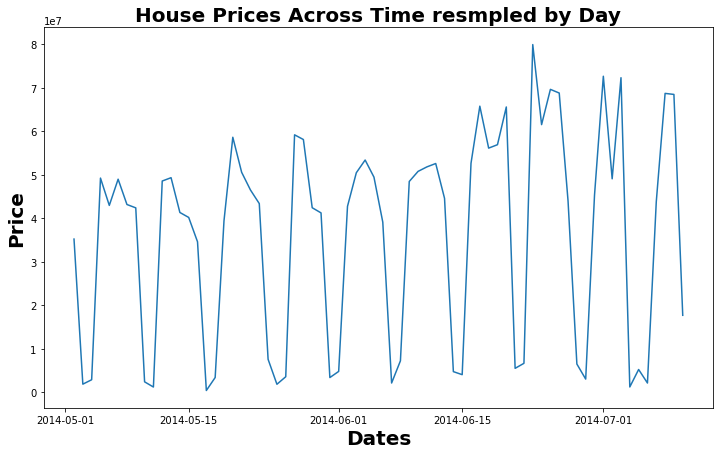

In [17]:
d_d = df_copy[['date', 'price']]
d_d = d_d.set_index('date')
plt.figure(figsize=(12, 7))
plt.plot(d_d.resample('D').sum())
plt.title('House Prices Across Time resmpled by Day', size=20, fontweight='bold')
plt.xlabel('Dates', fontsize=20, fontweight='bold')
plt.ylabel('Price', fontsize=20, fontweight='bold')
plt.show()

Now we can see some trends AMAZING right, ikr huhh, okay so we could observe some patterns in the early stage of may and that trend continues till June but price picks up a bit in July so we could say houses were expensive or price of houses hikes in July when compared to May and June

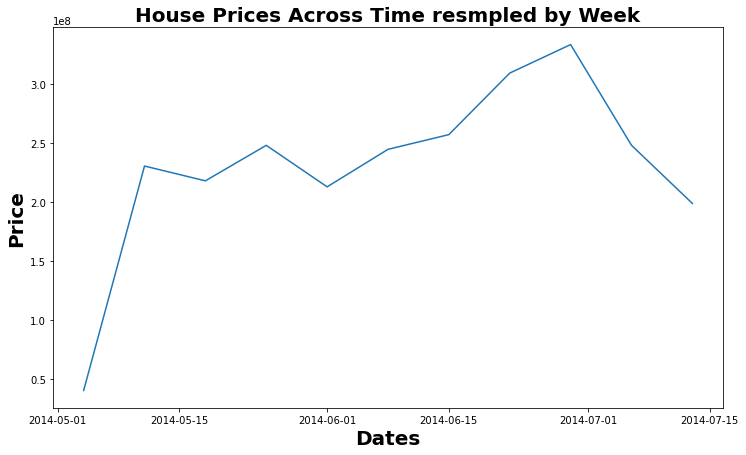

In [19]:
plt.figure(figsize=(12, 7))
plt.plot(d_d.resample('W').sum())
plt.title('House Prices Across Time resmpled by Week', size=20, fontweight='bold')
plt.xlabel('Dates', fontsize=20, fontweight='bold')
plt.ylabel('Price', fontsize=20, fontweight='bold')
plt.show()

Now this chart explains the progression and drastic increase in price of house from may till July before it drops back down in early July

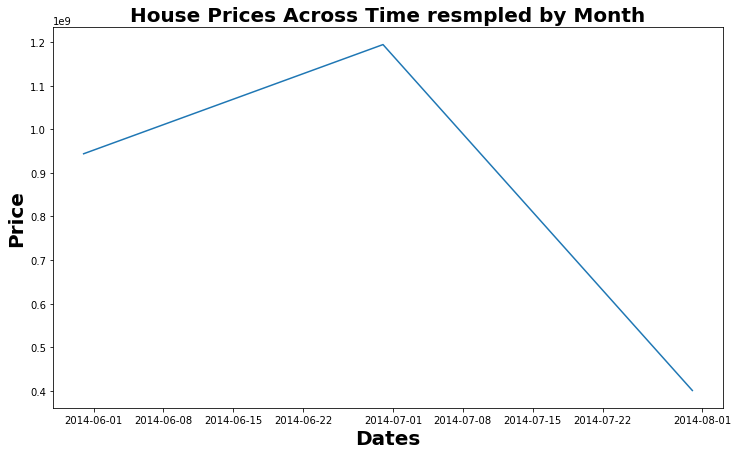

In [21]:
plt.figure(figsize=(12, 7))
plt.plot(d_d.resample('M').sum())
plt.title('House Prices Across Time resmpled by Month', size=20, fontweight='bold')
plt.xlabel('Dates', fontsize=20, fontweight='bold')
plt.ylabel('Price', fontsize=20, fontweight='bold')
plt.show()

So the Drop down actually happend at the start of July. We might want to ask why that is what are the reasons responsible for the drastic fall in house price. Let get the Average of Sales per month maybe we could have more insights as to what is happening

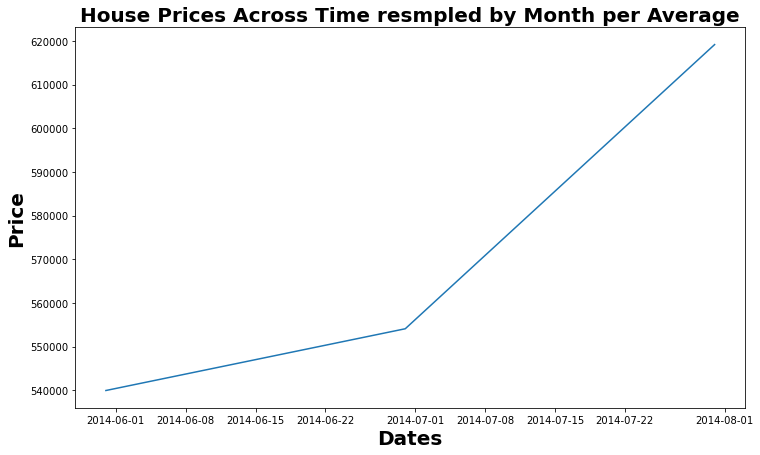

In [22]:
plt.figure(figsize=(12, 7))
plt.plot(d_d.resample('M').mean())
plt.title('House Prices Across Time resmpled by Month per Average', size=20, fontweight='bold')
plt.xlabel('Dates', fontsize=20, fontweight='bold')
plt.ylabel('Price', fontsize=20, fontweight='bold')
plt.show()

Now what this is saying is that on a average the price actually goes up each month but the rate at which it goes up is considerably low and hence the drastic fall. 

**To Some Up all we have find out from the price time trend,**
1. Date is an important feature to determine house price
2. Since we cant use date raw in our model Day and months are the features we can extract
3. House price varies on a monthly basis
4. Exploration is pure ART lots of way around it. I LOVE IT

Now to Price Distribution, let check if it has a Guassian Distribution or not

In [24]:
del d_d, d

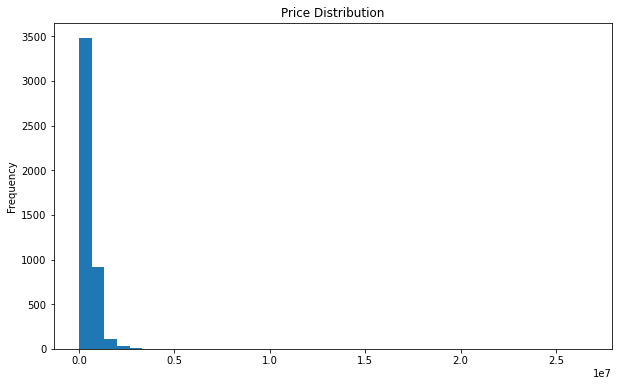

In [26]:
df_copy['price'].plot(kind='hist', bins=40, figsize=(10, 6), title='Price Distribution')
plt.show()

I think it is safe to say the data is highly skewed atleast for the price variable.

Because we want a reliable and good model, we will drill down to understand if there are outliers in the price variable using a box plot.

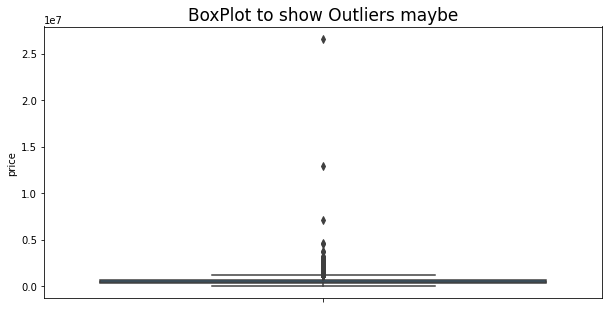

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_copy['price'], orient='vert')
plt.title('BoxPlot to show Outliers maybe', size=17)
plt.show()

Well there you have IT AN OUTLIER whooo. AMAZING.

So let remove it shall we?? we would use the statistical method of removing outlier which is the zscore or the IQR

In [ ]:
# fix outlier
def fix_outlier(df, column):
    """
    Fix Outlier will take 2 argument
    df = dataframe
    column = column that has an outlier value(s)
    outlier will be replaced by median value of any column 
    return a series of fixed outier
    """
    df[column] = np.where(df[column] > df[column].quantile(0.95),
                                        df[column].median(),
                                        df[column])
    return df

In [37]:
mean = df_copy['price'].mean()
std = df_copy['price'].std()
cut_off = std*3

lower, upper = mean - cut_off, mean + cut_off

df_no_outlier = df_copy[(df_copy['price'] < upper) & (df['price'] > lower)]

df_no_outlier.shape

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


(4517, 18)

In [38]:
# Q1 = df_copy['price'].quantile(0.25)
# Q3 = df_copy['price'].quantile(0.75)
# IQR = Q3 - Q1

# df_copy_no_out = df_copy[~((df_copy['price'] < (Q1 - 1.5 * IQR)) | (df_copy['price'] > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(df_copy.shape)
# print(df_copy_no_out.shape)

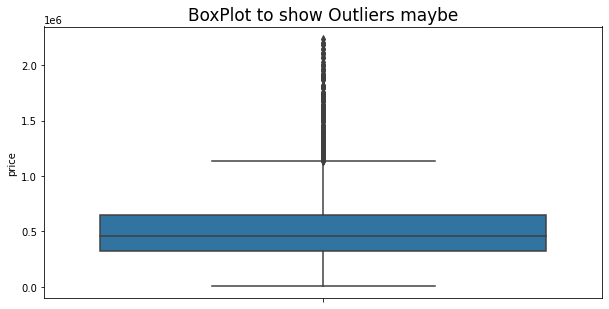

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_no_outlier['price'], orient='vert')
plt.title('BoxPlot to show Outliers maybe', size=17)
plt.show()

Well Well the outlier are Out AMAZING, now let see the stats distribution

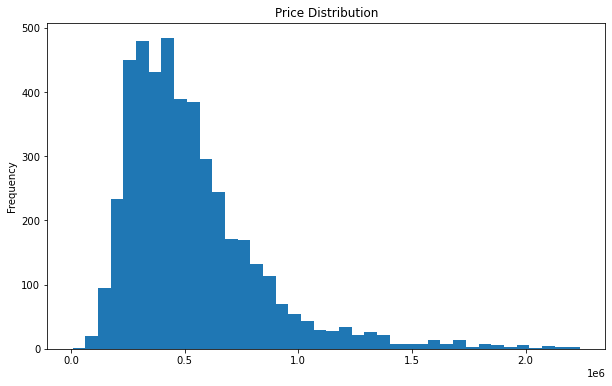

In [41]:
df_no_outlier['price'].plot(kind='hist', bins=40, figsize=(10, 6), title='Price Distribution')
plt.show()

Well it a positively skewed (left skewness) data so we could apply square log to fix this as well but we just gonna leave it now YEA

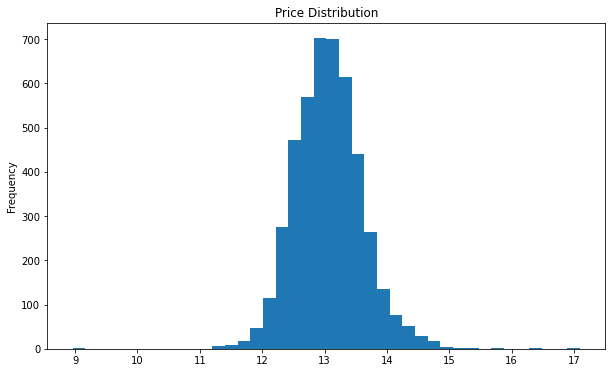

In [42]:
np.log(df_copy['price']).plot(kind='hist', bins=40, figsize=(10, 6), title='Price Distribution')
plt.show()

Well we have ouranswer dont we?? can i hear you say AMAZING AMAZING

In [43]:
df_no_outlier.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

Next is Bedroom and Bath rooms well they are a distinct integer type like they are not continous so best bet is to visualize them with BAR chart yes??

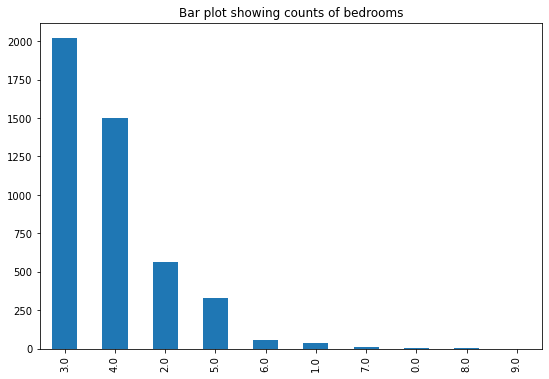

In [44]:
df_no_outlier['bedrooms'].value_counts().plot.bar(figsize=(9, 6), title='Bar plot showing counts of bedrooms')
plt.show()

We have about 2000 houses with 3 bedrooms and about 1500 houses with 4, only about 50 or less house has more than 6 bedrooms.

What this leads us into is an assumption that maybe many bedrooms means expensive house but then it what we can verify but not now, we still exploring

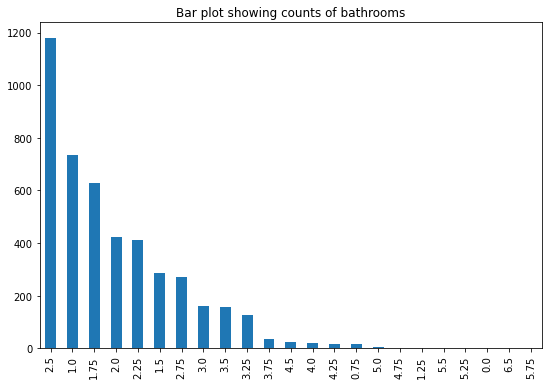

In [45]:
df_no_outlier['bathrooms'].value_counts().plot.bar(figsize=(9, 6), title='Bar plot showing counts of bathrooms')
plt.show()

well, this is interesting as we have 2.5 bathrooms i think a complete bathroom would be one with a toilet so if a toilet ain't present then it an half bathroom make sense right???

<AxesSubplot:title={'center':'sqft_living distribution'}, ylabel='Frequency'>

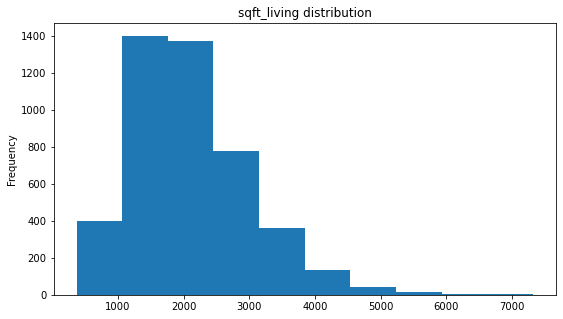

In [46]:
df_no_outlier['sqft_living'].plot.hist(figsize=(9, 5), title='sqft_living distribution')

Again, Right Skewed you'd say maybe it dependent on the price yes?

Another Assumption could be the wider (sqft_living) the house, the more expensive it will be YES??

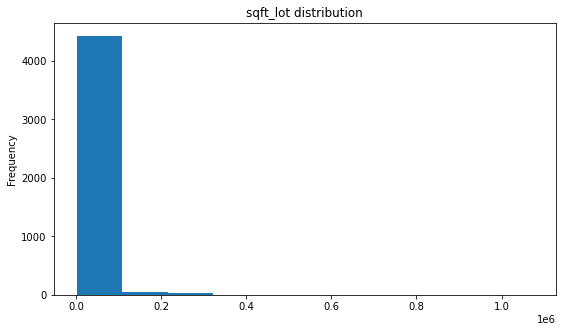

In [47]:
df_no_outlier['sqft_lot'].plot.hist(figsize=(9, 5), title='sqft_lot distribution')
plt.show()

Another Skewness now this is unacceptable so lwet try to fix it

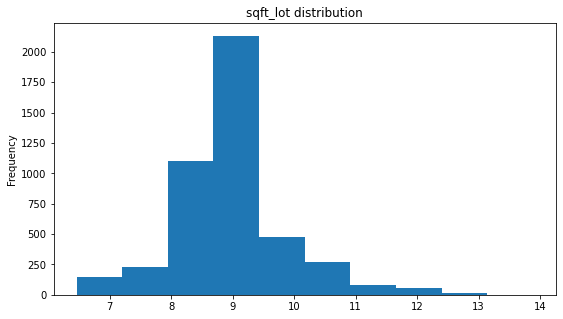

In [48]:
np.log(df_no_outlier['sqft_lot']).plot.hist(figsize=(9, 5), title='sqft_lot distribution')
plt.show()

Looks like taking the log is just fine YES??

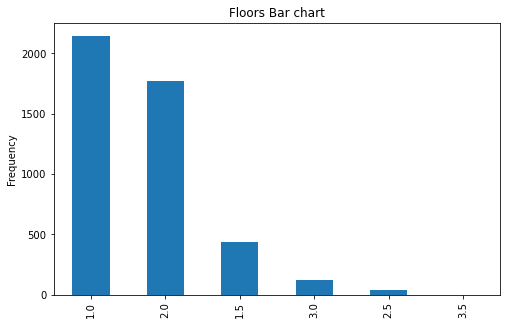

In [50]:
df_no_outlier['floors'].value_counts().plot.bar(figsize=(8, 5), title='Floors Bar chart')
plt.ylabel('Frequency')
plt.show()

Now the decimal floor values i dont understand

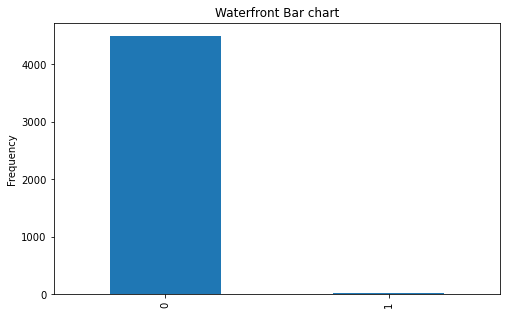

In [52]:
df_no_outlier['waterfront'].value_counts().plot(kind='bar', figsize=(8, 5), title='Waterfront Bar chart')
plt.ylabel('Frequency'); plt.show()

Many of the House had no waterfront WOW, this feature/variable might not be an important determinant of the price of house

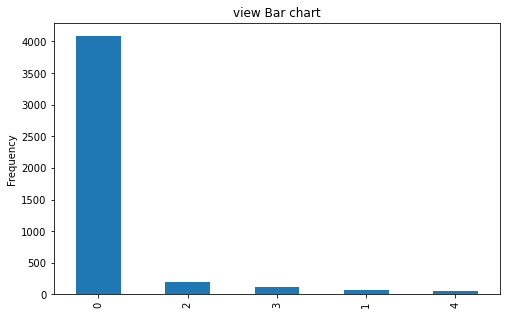

In [53]:
df_no_outlier['view'].value_counts().plot(kind='bar', figsize=(8, 5), title='view Bar chart')
plt.ylabel('Frequency'); plt.show()


Again, about 90% of the house has no view

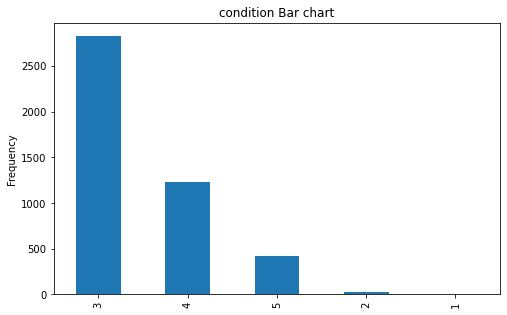

In [54]:
df_no_outlier['condition'].value_counts().plot(kind='bar', figsize=(8, 5), title='condition Bar chart')
plt.ylabel('Frequency'); plt.show()


This is rated as Excellent to very Good to Good with 5 being the best value and 1 the worst case. it shows that majority of the house are in an Average condition

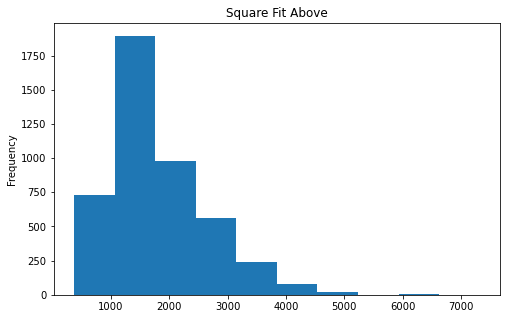

In [56]:
df_no_outlier['sqft_above'].plot.hist(figsize=(8, 5), title='Square Fit Above')
plt.show()

Again, alll sqft features are affected by price hence they should be a good predictor for the independent variable

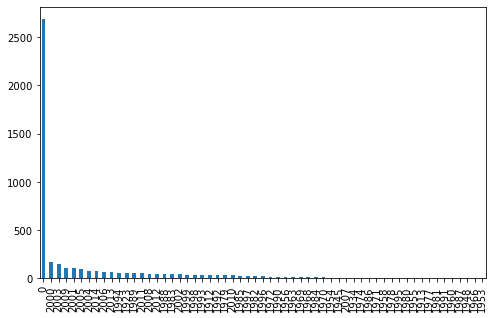

In [59]:
df_no_outlier['yr_renovated'].value_counts().plot(kind='bar', figsize=(8,5))
plt.show()

i guess 0 means the house was not renovated at all. which might explains why most of the house are in an average condition

In [62]:
df_no_outlier['city'].value_counts()

Seattle                1548
Renton                  291
Bellevue                277
Redmond                 234
Issaquah                186
Kirkland                185
Kent                    183
Auburn                  175
Sammamish               170
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            77
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Newcastle                33
Bothell                  33
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Black Diamond             8
Ravensdale                7
Clyde Hill                7
Medina                    6
Pacific             

End of Univariate Analysis

Bi-Variate Analysis

In [63]:
df_no_outlier.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [74]:
df_no_outlier['view'].nunique()

5

In [72]:

fig = px.bar(df_no_outlier, x="bedrooms", y="price", barmode="group")
fig

In [78]:
fig = px.scatter(df_no_outlier, x='sqft_living', y='price', size='bathrooms', color='view', hover_name='street', 
                 log_x=True, size_max=20)

fig

Well there exist a kind of linear trend here the more sqft_living the higher the price of the house. A good predictor NO?

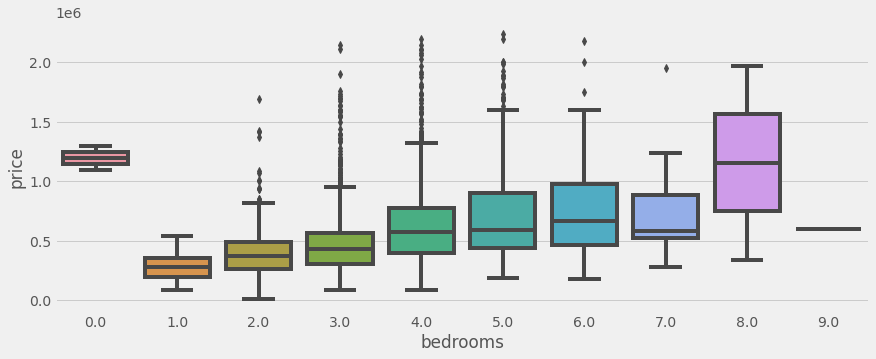

In [79]:
plt.figure(figsize=(13, 5))
sns.boxplot(x='bedrooms', y='price', data=df_no_outlier)
plt.show()

In [82]:
fig = px.scatter(df_no_outlier, x='sqft_basement', y='price', size='sqft_lot', color='condition', hover_name='street', 
                 log_x=True, size_max=60)

fig

In [84]:
fig = px.scatter(df_no_outlier, x='sqft_basement', y='price', size='sqft_above', color='country', hover_name='street', 
                 log_x=True, size_max=30)

fig

In [ ]:
# save cleaned data in to the data folder
df_no_outlier.to_csv('cleaned_data.csv', index=False)
print(Done)